# MMA 867 - Project

## Forecasting Number of Gifts for IC Company using TimeSeries Analysis

## By Team Alfred

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pmd
from pmdarima.utils import c, diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA as AR
import statsmodels.api as sm

In [4]:
df_sales_train = pd.read_csv("./competitive-data-science-predict-future-sales/sales_train.csv")

In [5]:
df_sample = pd.read_csv("./competitive-data-science-predict-future-sales/sample_submission.csv")

In [6]:
df_item_categories = pd.read_csv("./competitive-data-science-predict-future-sales/item_categories.csv")

In [7]:
df_items = pd.read_csv("./competitive-data-science-predict-future-sales/items.csv")

In [8]:
df_test = pd.read_csv("./competitive-data-science-predict-future-sales/test.csv")

In [9]:
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
df_sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [11]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [12]:
df_sales_train.shape

(2935849, 6)

In [13]:
df_sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [14]:
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'])

In [15]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [16]:
df_sales_train_daily = pd.DataFrame(df_sales_train.groupby('date')['item_cnt_day'].sum())

In [17]:
df_sales_train_daily.head()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0


In [18]:
df_sales_train_monthly = pd.DataFrame(df_sales_train.groupby('date_block_num')['item_cnt_day'].sum())
df_sales_train_monthly.head()

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


Text(0, 0.5, 'Items Sold Daily')

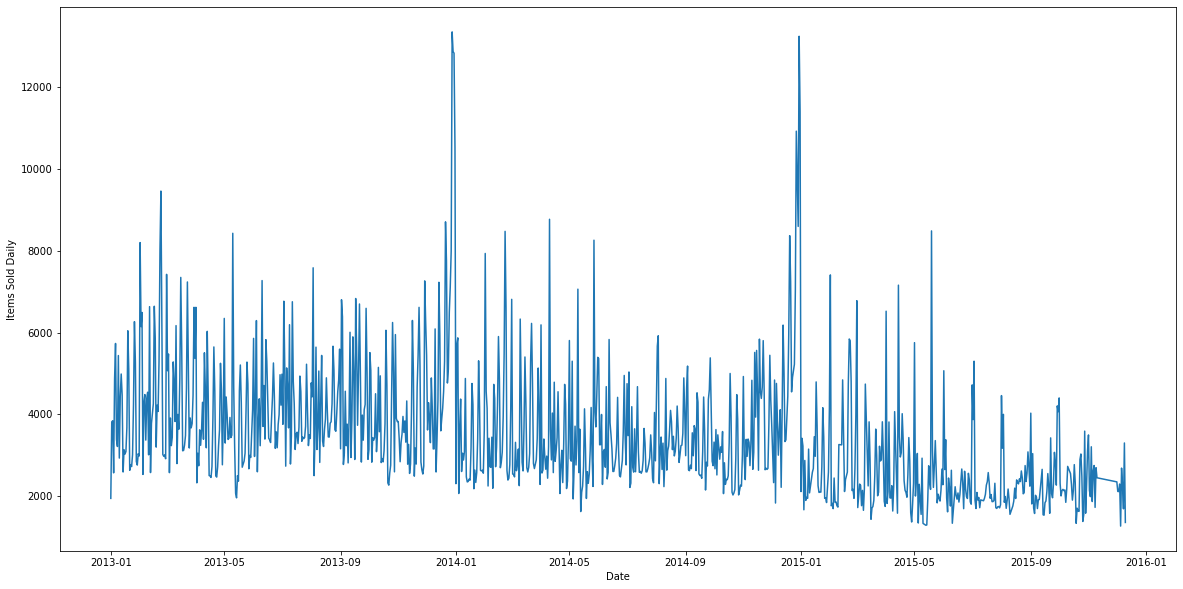

In [19]:
#Plot the timeseries

plt.figure(figsize = (20,10))
fig = plt.figure(1)
plt.plot(df_sales_train_daily)
plt.xlabel("Date")
plt.ylabel("Items Sold Daily")

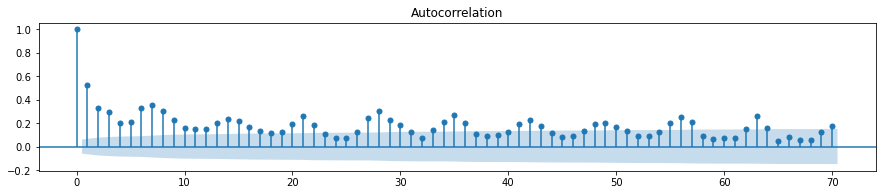

In [20]:
#Check ACF plot

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sales_train_daily.dropna(),lags = 70, ax = ax1)

In [52]:
#Create a differencing(remove seasonality) in the data by subtracting the shifted data from original
df_sales_train_daily_diff = df_sales_train_daily - df_sales_train_daily.shift(7)

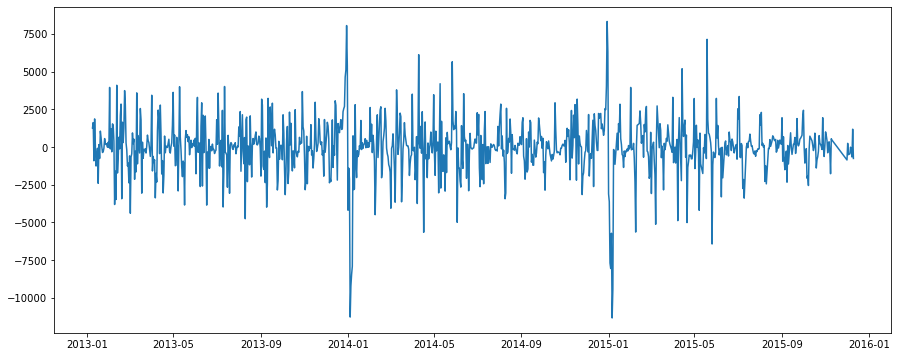

In [53]:
#plot the difference

plt.figure(figsize = (15,6))
plt.plot(df_sales_train_daily_diff, label='Original')   

In [54]:
#Seasonal Decomposition

decomp = seasonal_decompose(df_sales_train_daily, period = 7, model = 'multiplicative')

In [25]:
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

<function matplotlib.pyplot.show(close=None, block=None)>

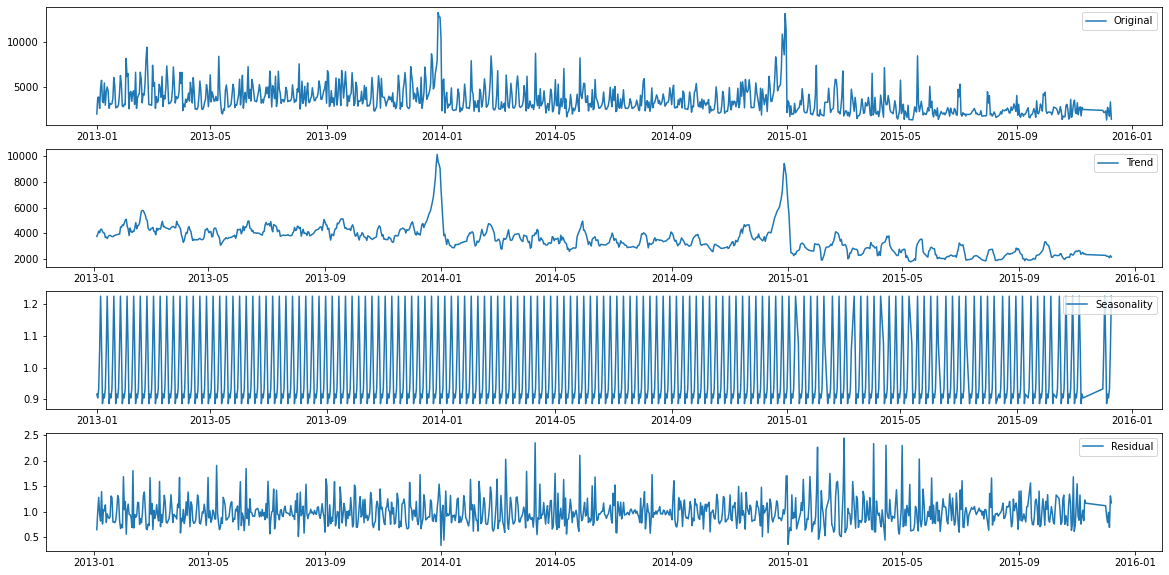

In [26]:
plt.figure(figsize = (20,10))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(df_sales_train_daily, label='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')

plt.show

In [31]:
#Create a function to run ARIMA
def runArima(timeseries, seasonal, m_val):
    model = pmd.auto_arima(timeseries,
                      test='adf',      
                      m=m_val,
                      seasonal=seasonal,   
                      start_P=0, max_P = 20,
                      start_Q=0, max_Q = 20,   
                      d=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    print(model.summary())
    return model

In [35]:
def predictArimaAndPlot(model_p, timeseries, logged, pds):
    # Forecast
    n_periods = pds

    fc, confint = model_p.predict(n_periods=n_periods, return_conf_int=True)
    date = timeseries.index[-1]
    index_of_fc = pd.date_range(date, periods=n_periods)

    # Plot
    plt.figure(figsize = (30,15))
    plt.plot(timeseries)
    if(logged):
         # make series for plotting purpose
        fc_series = pd.Series(fc, index=index_of_fc)
        exp_fc_series = pd.Series(np.exp(fc_series), index=index_of_fc)
        print(exp_fc_series)
        lower_series_l = pd.Series(confint[:, 0], index=index_of_fc)
        upper_series_l = pd.Series(confint[:, 1], index=index_of_fc)
        plt.plot(exp_fc_series, color='darkgreen')
        plt.fill_between(lower_series_l.index, lower_series_l, upper_series_l, color='k', alpha=.15)
    else:
         # make series for plotting purpose
        fc_series = pd.Series(fc, index=index_of_fc)
        print(fc_series)
        lower_series = pd.Series(confint[:, 0], index=index_of_fc)
        upper_series = pd.Series(confint[:, 1], index=index_of_fc)
        plt.plot(fc_series, color='darkgreen')
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

    plt.title("Final Forecast of ...")
    plt.show()


In [56]:
model_q1 = runArima(df_sales_train_daily_diff.dropna(), False, 1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=18188.205, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18311.235, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18195.449, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18209.489, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=18192.409, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18192.434, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=18095.117, Time=1.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18170.127, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=18107.992, Time=0.68 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=18042.797, Time=2.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=18042.425, Time=1.75 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=3.08 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=2.85 sec
 ARIMA(3,0,4)(0,0,0)[0]             :

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


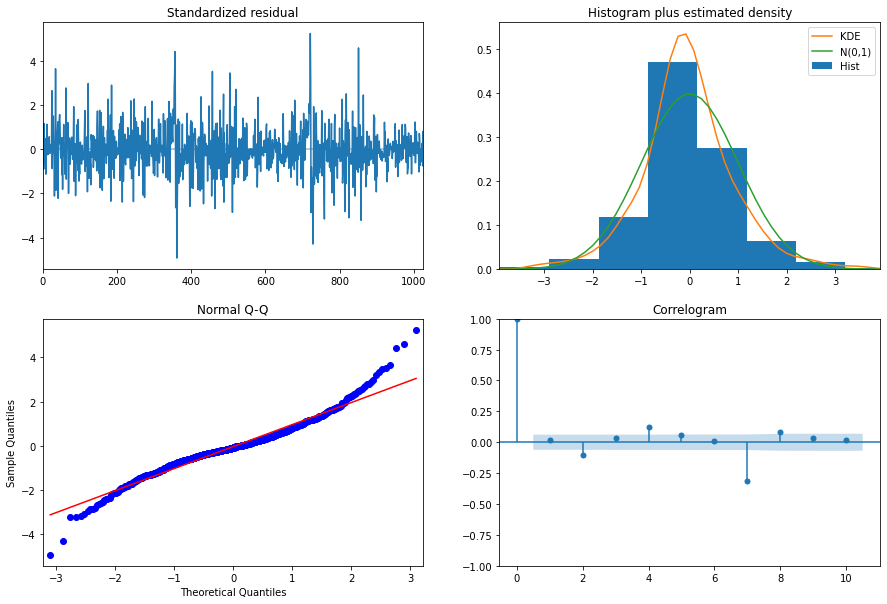

In [34]:
model_q1.plot_diagnostics(figsize=(15,10))
plt.show()

2015-12-10    406.381389
2015-12-11    403.971657
2015-12-12   -398.565449
2015-12-13    332.156845
2015-12-14    444.447103
2015-12-15   -288.856104
2015-12-16    176.961803
2015-12-17    390.287910
2015-12-18   -219.771373
2015-12-19     55.659473
2015-12-20    322.957195
2015-12-21   -157.898977
2015-12-22    -21.962419
2015-12-23    259.060080
2015-12-24   -102.671904
2015-12-25    -65.335127
2015-12-26    201.925725
2015-12-27    -56.898037
2015-12-28    -84.910469
2015-12-29    152.350195
2015-12-30    -21.775947
2015-12-31    -88.990150
2016-01-01    110.531051
2016-01-02      3.123448
2016-01-03    -83.658180
2016-01-04     76.317147
2016-01-05     19.172801
2016-01-06    -73.215499
2016-01-07     49.244900
2016-01-08     28.124525
Freq: D, dtype: float64


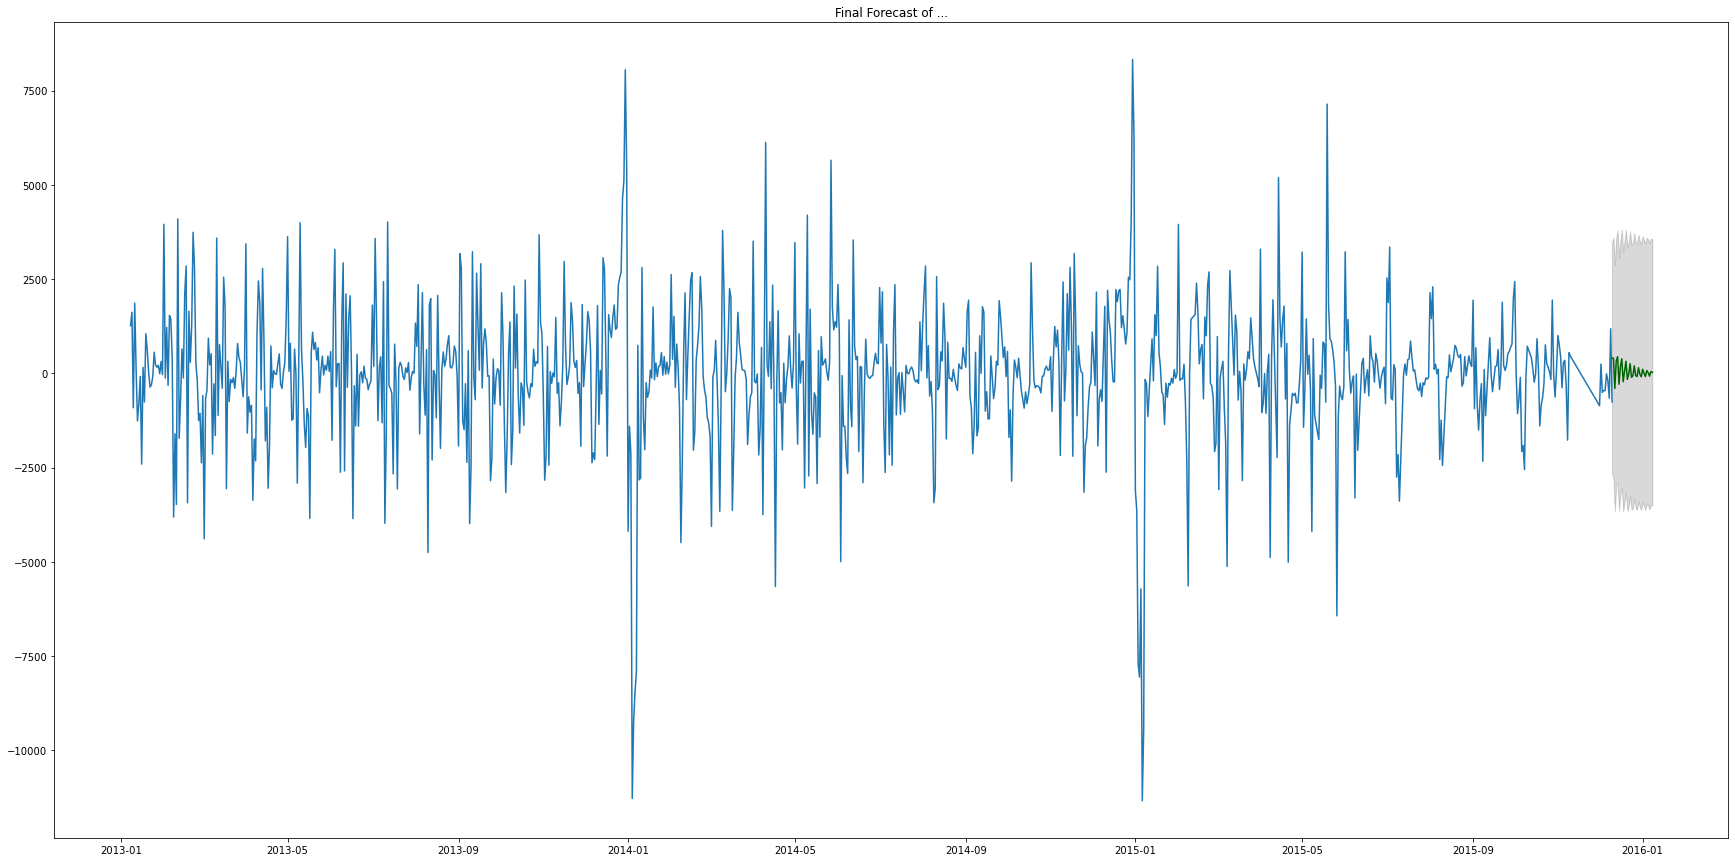

In [59]:
predictArimaAndPlot(model_q1,df_sales_train_daily_diff, False, 30 )